In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(r"C:\Users\marcos.sandovalr\Documents\Marcos Privada\Python Big Data\Python-TensorFlow-for-Machine-Learning-Neural-Network-Text-Classification-Tutorial\base_datos_2008.csv")
df.dropna(inplace=True, subset =["ArrDelay","DepDelay","Distance","AirTime"])
sns.set(rc={'figure.figsize':(15,10)})

C:\Users\marcos.sandovalr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


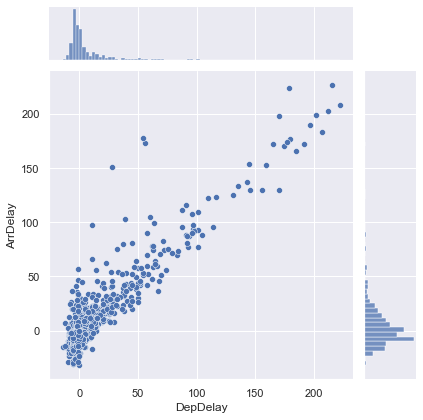

In [22]:
df2 = df[df["Origin"].isin(["ATL","HOU","IND"])].sample(frac=1).head(1000)
sns.jointplot(df2["DepDelay"],df2["ArrDelay"])

In [23]:
df3 = df2[np.abs(df2["DepDelay"])<40]
df3 = df3[np.abs(df3["ArrDelay"])<40]

C:\Users\marcos.sandovalr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


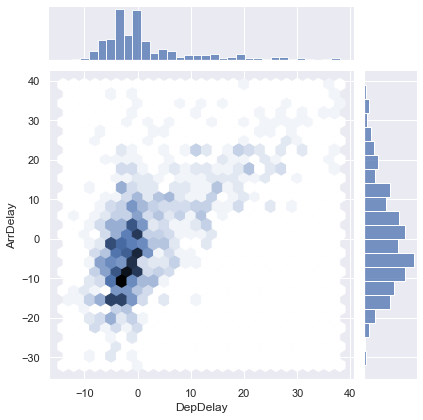

In [24]:
sns.jointplot(df3["DepDelay"],df3["ArrDelay"], kind="hex")

C:\Users\marcos.sandovalr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


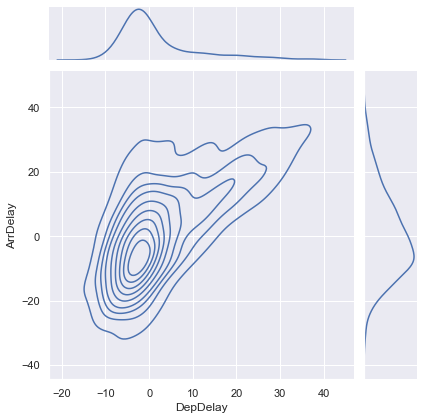

In [25]:
sns.jointplot(df3["DepDelay"],df3["ArrDelay"], kind="kde")

In [26]:
gb_df = pd.DataFrame(df2.groupby(["Origin","Month"], as_index=False)["DepDelay"].mean())
gb_df.head()

,Origin,Month,DepDelay
0,ATL,1,8.351351
1,ATL,2,13.402985
2,ATL,3,18.676923
3,ATL,4,3.100000
4,ATL,5,8.493151


In [27]:
data = gb_df.pivot("Month","Origin","DepDelay")
data

Origin,ATL,HOU,IND
Month,,,
1,8.351351,2.571429,17.800000
2,13.402985,29.875000,12.571429
3,18.676923,20.555556,35.166667
4,3.100000,1.166667,-3.800000
5,8.493151,7.266667,-0.666667
6,9.102941,36.625000,6.916667
7,26.112903,4.714286,0.000000
8,13.731343,27.000000,4.000000
9,9.409091,0.666667,-0.571429


<AxesSubplot:xlabel='Origin', ylabel='Month'>

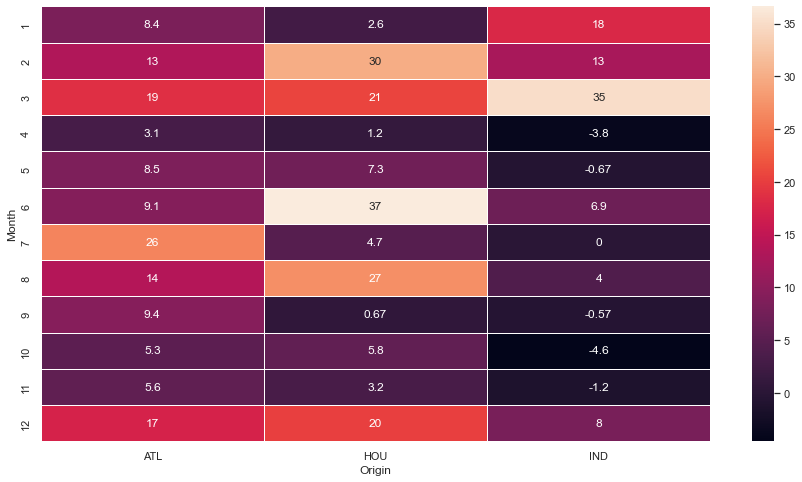

In [28]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data = data,annot=True,linewidth=.5)